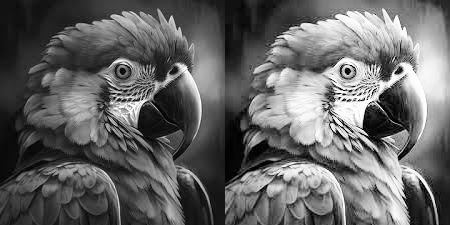

Histogram Equalization complete


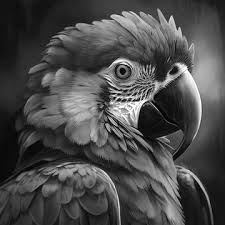

Original Image


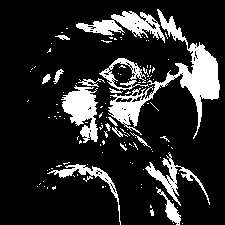

BINARY


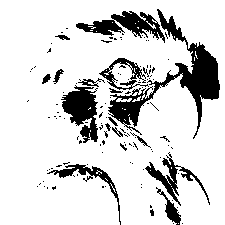

BINARY_INV


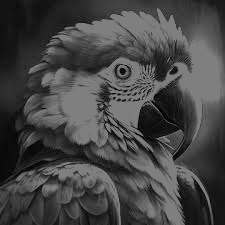

TRUNC


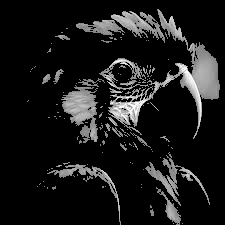

TOZERO


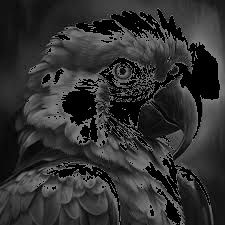

TOZERO_INV
Thresholding complete


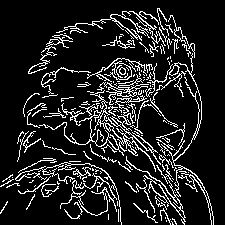

Edge Detection complete


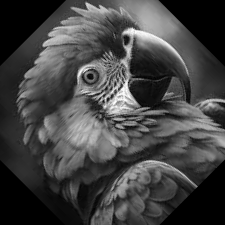

Data Augmentation (Rotation) complete


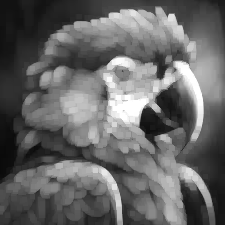

Morphological Operation (Dilation) complete


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for displaying images in Colab

img = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Histogram Equalization
equ = cv2.equalizeHist(img)
cv2_imshow(np.hstack((img, equ))) # Display original and equalized images side by side
print("Histogram Equalization complete")

# 2. Thresholding
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    cv2_imshow(images[i])
    print(titles[i])
print("Thresholding complete")

# 3. Edge Detection (Canny)
edges = cv2.Canny(img, 100, 200)
cv2_imshow(edges)
print("Edge Detection complete")

# 4. Data Augmentation
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))
cv2_imshow(rotated_img)
print("Data Augmentation (Rotation) complete")

# 5. Morphological Operations
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)
cv2_imshow(dilation)
print("Morphological Operation (Dilation) complete")

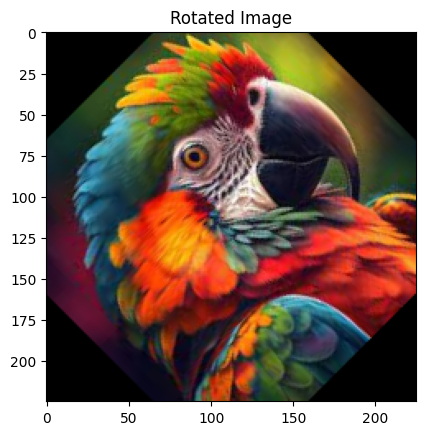

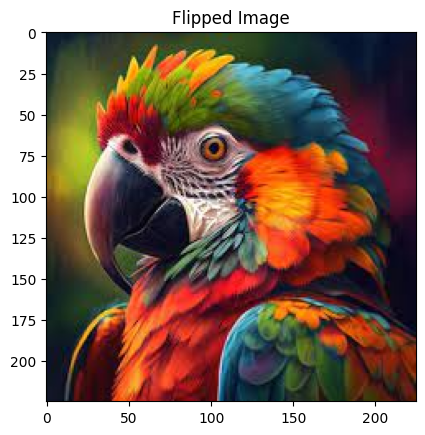

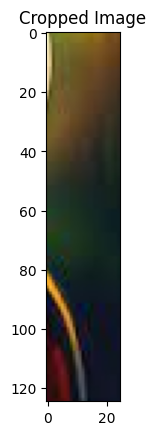

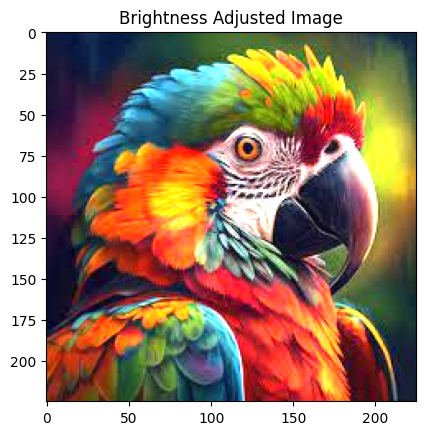

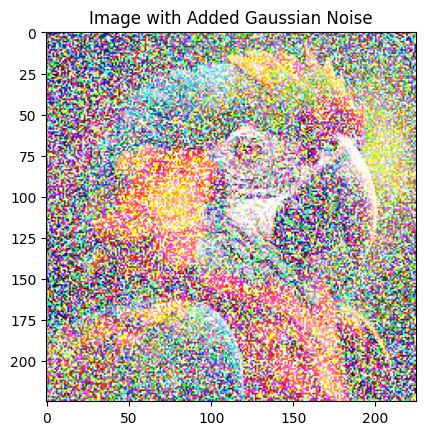

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


img = cv2.imread('images.jpeg')
if img is None:
    print("Error: Could not open or read the image.")
else:
    # Convert to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 1. Rotation
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
    rotated_img = cv2.warpAffine(img, M, (cols, rows))
    plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
    plt.title("Rotated Image")
    plt.show()


    # 2. Flipping
    flipped_img = cv2.flip(img, 1) # 1 for horizontal flip, 0 for vertical, -1 for both
    plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
    plt.title("Flipped Image")
    plt.show()


    # 3. Cropping
    cropped_img = img[100:300, 200:400] # Example crop
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Image")
    plt.show()


    # 4. Brightness Adjustment
    brightness_factor = 1.5  # Increase brightness
    bright_img = cv2.convertScaleAbs(img, alpha=brightness_factor, beta=0)
    plt.imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))
    plt.title("Brightness Adjusted Image")
    plt.show()

    # 5. Adding Noise (Gaussian Noise)
    noise = np.random.normal(0, 20, img.shape).astype(np.uint8) # Adjust standard deviation (20) as needed
    noisy_img = cv2.add(img, noise)
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8) # Ensure values within 0-255
    plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
    plt.title("Image with Added Gaussian Noise")
    plt.show()


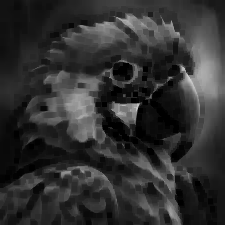

Erosion complete


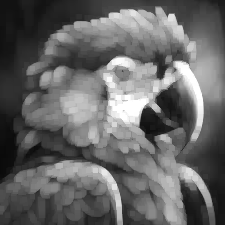

Dilation complete


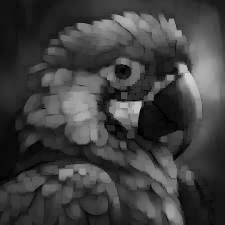

Opening complete


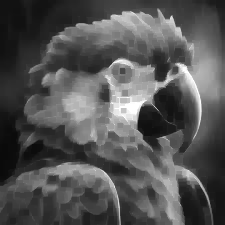

Closing complete


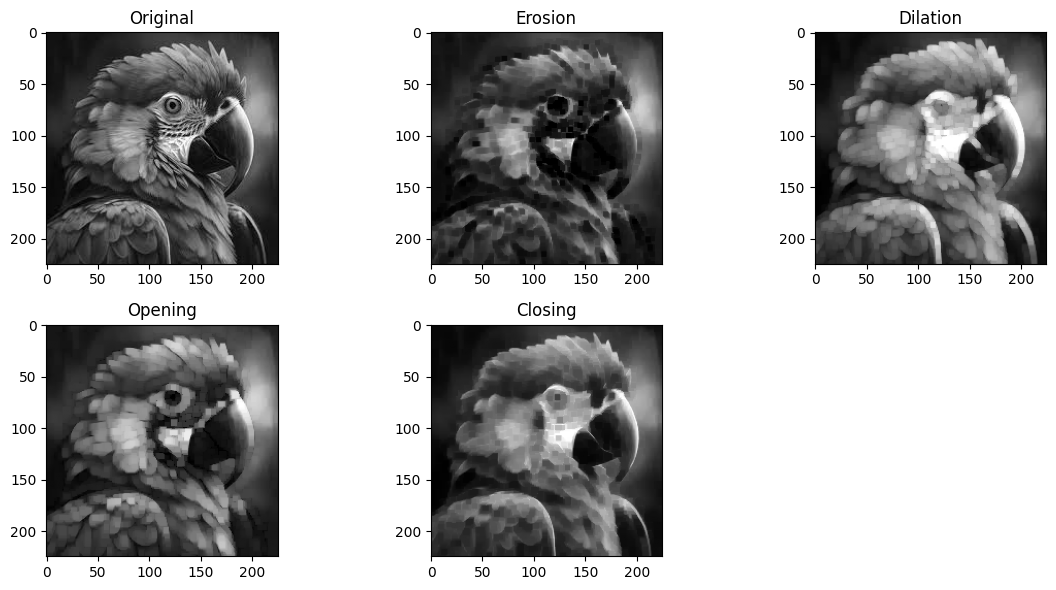

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for displaying images in Colab
import matplotlib.pyplot as plt

img = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size if needed

# 1. Erosion
erosion = cv2.erode(img, kernel, iterations=1)
cv2_imshow(erosion)
print("Erosion complete")

# 2. Dilation
dilation = cv2.dilate(img, kernel, iterations=1)
cv2_imshow(dilation)
print("Dilation complete")

# 3. Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)
print("Opening complete")

# 4. Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)
print("Closing complete")


# Display using matplotlib (optional, but often better for side-by-side comparisons)
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
plt.subplot(233), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
plt.subplot(234), plt.imshow(opening, cmap='gray'), plt.title('Opening')
plt.subplot(235), plt.imshow(closing, cmap='gray'), plt.title('Closing')
plt.tight_layout()
plt.show()
